In [2]:
import _pickle as cPickle
import bz2

import gzip
import json

import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt

GIBSON_OBJECT_COLORS = [
    (0.9400000000000001, 0.7818, 0.66),
    (0.9400000000000001, 0.8868, 0.66),
    (0.8882000000000001, 0.9400000000000001, 0.66),
    (0.7832000000000001, 0.9400000000000001, 0.66),
    (0.6782000000000001, 0.9400000000000001, 0.66),
    (0.66, 0.9400000000000001, 0.7468000000000001),
    (0.66, 0.9400000000000001, 0.8518000000000001),
    (0.66, 0.9232, 0.9400000000000001),
    (0.66, 0.8182, 0.9400000000000001),
    (0.66, 0.7132, 0.9400000000000001),
    (0.7117999999999999, 0.66, 0.9400000000000001),
    (0.8168, 0.66, 0.9400000000000001),
    (0.9218, 0.66, 0.9400000000000001),
    (0.9400000000000001, 0.66, 0.8531999999999998),
    (0.9400000000000001, 0.66, 0.748199999999999),
]

COLOR_PALETTE = [
    1.0,
    1.0,
    1.0,  # Out-of-bounds
    0.9,
    0.9,
    0.9,  # Floor
    *[oci for oc in GIBSON_OBJECT_COLORS for oci in oc],
]

val_rooms = ['Collierville', 'Corozal', 'Darden', 'Markleeville', 'Wiconisco']
episodes_file = '../data/objectgoal_gibson/val/content/Darden_episodes.json.gz'
dataset_info_file = '../data/objectgoal_gibson/val/val_info.pbz2'

In [1]:
def visualize_sem_map(sem_map):
    c_map = sem_map.astype(np.int32)
    color_palette = [int(x * 255.0) for x in COLOR_PALETTE]
    semantic_img = Image.new("P", (c_map.shape[1], c_map.shape[0]))
    semantic_img.putpalette(color_palette)
    semantic_img.putdata((c_map.flatten() % 40).astype(np.uint8))
    semantic_img = semantic_img.convert("RGB")
    semantic_img = np.array(semantic_img)

    return semantic_img

def projection_img(sem_mp):
    semantic_img = np.zeros((sem_mp.shape[1], sem_mp.shape[2]))
    for i in range(sem_mp.shape[0]):
        semantic_img[sem_mp[i].astype(np.bool_)] = i+1
    return semantic_img.transpose()

Collierville
[0]
(16, 149, 239)
(239, 149)
Corozal
[0]
(16, 275, 428)
(428, 275)
Darden
[0]
(16, 415, 186)
(186, 415)
Markleeville
[0]
(16, 266, 206)
(206, 266)
Wiconisco
[0]
(16, 310, 319)
(319, 310)


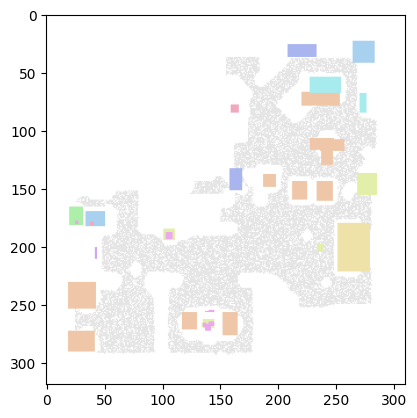

In [3]:
with bz2.BZ2File(dataset_info_file, "rb") as f:
    dataset_info = cPickle.load(f)

for scene_name in val_rooms:
    print(scene_name)
    episodes_file = '../data/objectgoal_gibson/val/content/{}_episodes.json.gz'.format(scene_name)
    with gzip.open(episodes_file, "r") as f:
        eps_data = json.loads(f.read().decode("utf-8"))["episodes"]
    all_floor_id = []
    for eps in eps_data:
        floor_id = eps['floor_id']
        all_floor_id.append(floor_id)
    all_floor_id = list(set(all_floor_id))
    print(all_floor_id)
     
    sem_map = dataset_info[scene_name][floor_id]["sem_map"]
    print(sem_map.shape)
    projected_map = projection_img(sem_map)
    print(projected_map.shape)
    semantic_image = visualize_sem_map(projected_map)
    plt.imshow(semantic_image)
    plt.imsave("../tmp/img/semantic_map.png", semantic_image)